In [42]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import cv2
from glob import glob

#config
data_path = ".\\data\\raw\\shoe"

In [43]:
camera_pose_path = os.path.join(data_path, "dataShot.json")
with open(camera_pose_path, 'r') as file:
        camera_pose = json.load(file)

Thông tin về điểm gốc

In [44]:
x_origin = camera_pose[0]['ObjPosX']
y_origin = camera_pose[0]['ObjPosY']
z_origin = camera_pose[0]['ObjPosZ']
list_x = [x_origin]*len(camera_pose)
list_y = [y_origin]*len(camera_pose)
list_z = [z_origin]*len(camera_pose)

Thông tin về tọa độ camera

In [45]:
x_points = []
y_points = []
z_points = []

list_directionX = []
list_directionY = []
list_directionZ = []

for info_image in camera_pose:
    x = info_image['CamPosX'] - x_origin
    y = info_image['CamPosY'] - y_origin
    z = info_image['CamPosZ'] - z_origin
    
    x_points.append(x)
    y_points.append(y)
    z_points.append(z)

    directionX = [info_image["vxX"], info_image["vxY"], info_image["vxZ"]]
    directionY = [info_image["vyX"], info_image["vyY"], info_image["vyZ"]]
    directionZ = [info_image["vzX"], info_image["vzY"], info_image["vzZ"]]
    
    list_directionX.append(directionX)
    list_directionY.append(directionY)
    list_directionZ.append(directionZ)

In [46]:
list_directionxX= [x for x,y,z in list_directionX]
list_directionyX= [y for x,y,z in list_directionX]
list_directionzX= [z for x,y,z in list_directionX]

list_directionxY= [x for x,y,z in list_directionY]
list_directionyY= [y for x,y,z in list_directionY]
list_directionzY= [z for x,y,z in list_directionY]

list_directionxZ= [x for x,y,z in list_directionZ]
list_directionyZ= [y for x,y,z in list_directionZ]
list_directionzZ= [z for x,y,z in list_directionZ]

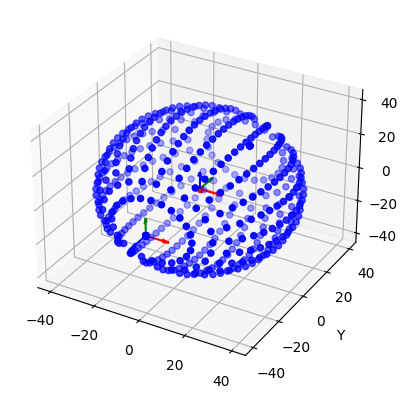

In [47]:
# Tạo figure và axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Thêm tọa độ điểm gốc
ax.scatter(0, 0, 0, c='red')  # Điểm thứ nhất, màu đỏ
ax.quiver(0, 0, 0, 10, 0, 0, length=1,color='red') # x
ax.quiver(0, 0, 0, 0, 10, 0, length=1,color='green') # y
ax.quiver(0, 0, 0, 0, 0, 10, length=1,color='blue') # z

num_check = 0
ax.scatter(x_points, y_points, z_points, c='blue')  # Điểm thứ hai, màu xanh
ax.quiver(x_points[num_check], y_points[num_check], z_points[num_check], list_directionxX[num_check], list_directionyX[num_check], list_directionzX[num_check], length=10, color='red')
ax.quiver(x_points[num_check], y_points[num_check], z_points[num_check], -list_directionxY[num_check], -list_directionyY[num_check], -list_directionzY[num_check], length=10, color='green')
ax.quiver(x_points[num_check], y_points[num_check], z_points[num_check], -list_directionxZ[num_check], -list_directionyZ[num_check], -list_directionzZ[num_check], length=10, color='blue')
ax.set_ylabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Xuất ra file transforms.json

In [48]:
file_path = os.path.join(data_path, "transforms.json")

In [49]:

image_path = os.path.join(data_path, "images", "*")
list_image_path = glob(image_path)

img_path = list_image_path[0]
image = cv2.imread(img_path)

# Kiểm tra nếu ảnh đã được đọc thành công
if image is not None:
    # Xem kích thước ảnh (số chiều)
    height, width, channels = image.shape
    print("Kích thước ảnh: {}x{}x{}".format(width, height, channels))
else:
    print("Không thể đọc ảnh")


Kích thước ảnh: 3840x2160x3


In [50]:
fl = 5000


In [51]:
camera_angle_x = math.atan(width/(fl*2))*2

In [52]:
frames = []
for i in range(len(list_image_path)):
    image_path = list_image_path[i]
    name_img = os.path.basename(image_path)
    
    R = [[list_directionxX[i], list_directionxY[i], list_directionzX[i]], [-list_directionxY[i], -list_directionxY[i], -list_directionxY[i]], [-list_directionxZ[i], -list_directionxZ[i], -list_directionxZ[i]]]
    C = [x_points[i], y_points[i], z_points[i]]
    t = np.dot(R,C)

    transform_matrix = [[R[0][0], R[0][1], R[0][2], x_points[i]],
                        [R[1][0], R[1][1], R[1][2], y_points[i]],
                        [R[2][0], R[2][1], R[2][2], z_points[i]],
                        [0.0, 0.0, 0.0, 1.0]]

    frame = {"file_path": f".\\images\\{name_img}",
    "transform_matrix": transform_matrix}
    frames.append(frame)

In [53]:
data = {
    "camera_angle_x": camera_angle_x,
    "aabb_scale": 1,
    "frames": frames,
}

In [54]:
# Ghi dữ liệu vào file .json
with open(file_path, "w") as json_file:
    json.dump(data, json_file)